Fundamentos de machine learning
===

Preparación
----

In [27]:
import pandas as pd

scopus = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-papers.csv")
scopus['Author Keywords'].head()

0    Geo-location data; Human mobility; Resilience;...
1    Language analysis; LIWC; Moral foundations the...
2    Gravity model; Media ecosystem; News spreading...
3    Centrality measures; Community Structure; Infl...
4    Cholesterol; Diabetes; Digital purchase record...
Name: Author Keywords, dtype: object

Descripción del problema
---

La columna `'Author Keywords'` contiene las palabras claves de un conjunto de artículos extraído de Scopus. Estas palabras clave son consideradas descriptores del contenido del artículo, por lo que su análisis permite establecer el contenido conceptual de un cuerpo de literatura. De ahí que muchas técnicas de estadística y aprendizaje de máquinas sean empleadas para su análisis.

En este ejercicio, usted empleará los conocimientos adquiridos en el curso para construir un gráfico análitico comúnmente usado para el análisis comparativo de palabras que representan conceptos. Véase por ejemplo https://tlab.it/en/allegati/help_en_online/msvd.htm

1. Determine las 100 palabras clave más frecuentes. Utilice las funciones de Pandas para manipular el archivo, realizar el conteo a partir de los datos de la columna 'Author Keywords'. Como evidencia de este punto imprima las primeras y las últimas 5 palabras de este grupo de 100 palabras, y su frecuencia.

2. Construya la matriz documento-termino. Las filas son los documentos y las columnas son las 100 palabras clave más frecuentes. La matriz debería estar poblada de unos y ceros. Debe eliminar las filas que corresponden a los documentos que no usan ninguna de las 100 palabras clave más frecuentes. Como evidencia verifique que la suma de las columnas de la matriz documento-término es igual a la frecuencia computada para cada palabra en el punto anterior.

3. Construya la matriz de co-ocurrencias. En esta matriz, las filas y las columnas corresponden a las palabras claves. La diagonal es el total de veces que aparece la respectiva palabra. Los demas elementos de la matriz corresponden a las veces que aparece la palabra A con la palabra B en un mismo documento. esta matriz puede calcularse como transpuesta(A) * A, donde A es la matriz docuemnto-término. Como evidencia, grafique un mapa de calor, como por ejemplo, los obtenidos al usar seaborn. 

4. Para visualizar las relaciones de las palabras clave (cercanía), se puede reducir la dimensionalidad de la matriz de co-occurrencias a dos componentes usando SVD (o MSD), y graficar las palabras clave a partir de las coordenadas obtenidas. Un ejemplo se presenta a continuación (extraido del manual de usuario de T-LAB). El tamaño del texto es proporcional a la frecuencia de las palabras clave. Construya un gráfico similar a partir de la matriz de co-occurrencias que fue obtenida en el punto anterior.

![tlab](https://tlab.it/en/allegati/help_en_online/tlab_image/svd05.gif)

1. Determine las 100 palabras clave más frecuentes. Utilice las funciones de Pandas para manipular el archivo, realizar el conteo a partir de los datos de la columna 'Author Keywords'. Como evidencia de este punto imprima las primeras y las últimas 5 palabras de este grupo de 100 palabras, y su frecuencia.


In [28]:
import numpy as np
import re

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")

df = scopus.loc[:,['Author Keywords']]
df['Author Keywords'].fillna(0, inplace = True)
df.drop(df[df['Author Keywords'] == 0].index, inplace = True)
df = df.replace(' ', '_', regex=True)
df = df.replace(';_', '; ', regex=True)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

vectorizer = CountVectorizer(preprocessor=preprocess_text, stop_words="english", max_features=100)
X = vectorizer.fit_transform(df['Author Keywords'])
p = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

l = vectorizer.get_feature_names_out().tolist()
l = [x.replace('_',' ') for x in l]

p = pd.DataFrame(X.toarray(), columns=l)

contador = p.sum()
contador = contador.sort_values(ascending=False)
contador

big data             167
data mining          135
machine learning      57
multi                 44
clustering            42
                    ... 
world data system      7
means clustering       7
network                7
cloud                  7
xml                    7
Length: 100, dtype: int64

2. Construya la matriz documento-termino. Las filas son los documentos y las columnas son las 100 palabras clave más frecuentes. La matriz debería estar poblada de unos y ceros. Debe eliminar las filas que corresponden a los documentos que no usan ninguna de las 100 palabras clave más frecuentes. Como evidencia verifique que la suma de las columnas de la matriz documento-término es igual a la frecuencia computada para cada palabra en el punto anterior.

In [29]:
p['suma'] = p.sum(axis=1)
p = p[p['suma'] != 0]
p.drop(['suma'], axis=1, inplace=True)
print('\nmatriz_documento-termino:\n{0}'.format(p)) 


matriz_documento-termino:
      accessibility  agent  analysis  ...  web mining  world data system  xml
0                 0      0         0  ...           0                  0    0
5                 0      0         0  ...           0                  0    0
7                 0      0         0  ...           0                  0    0
9                 0      0         0  ...           0                  0    0
11                0      0         0  ...           0                  0    0
...             ...    ...       ...  ...         ...                ...  ...
1785              0      0         0  ...           0                  0    0
1787              0      0         0  ...           0                  0    1
1788              0      0         0  ...           0                  0    0
1789              0      0         0  ...           0                  0    0
1792              0      0         0  ...           0                  0    0

[1047 rows x 100 columns]


3. Construya la matriz de co-ocurrencias. En esta matriz, las filas y las columnas corresponden a las palabras claves. La diagonal es el total de veces que aparece la respectiva palabra. Los demas elementos de la matriz corresponden a las veces que aparece la palabra A con la palabra B en un mismo documento. esta matriz puede calcularse como transpuesta(A) * A, donde A es la matriz docuemnto-término. Como evidencia, grafique un mapa de calor, como por ejemplo, los obtenidos al usar seaborn. 

In [30]:
cooccurrence_matrix = np.dot(p.transpose(),p)
print('\ncooccurrence_matrix:\n{0}'.format(cooccurrence_matrix)) 


cooccurrence_matrix:
[[10  1  0 ...  0  0  0]
 [ 1  9  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]


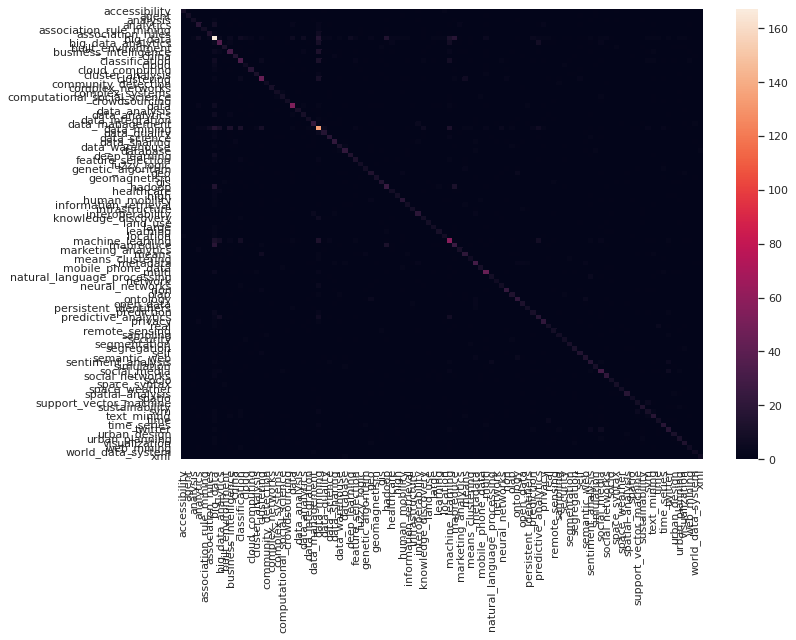

In [31]:
ax = sns.heatmap(cooccurrence_matrix, xticklabels=vectorizer.get_feature_names(), 
                 yticklabels=vectorizer.get_feature_names())

4. Para visualizar las relaciones de las palabras clave (cercanía), se puede reducir la dimensionalidad de la matriz de co-occurrencias a dos componentes usando SVD (o MSD), y graficar las palabras clave a partir de las coordenadas obtenidas. Un ejemplo se presenta a continuación (extraido del manual de usuario de T-LAB). El tamaño del texto es proporcional a la frecuencia de las palabras clave. Construya un gráfico similar a partir de la matriz de co-occurrencias que fue obtenida en el punto anterior.

In [32]:
transformer = TfidfTransformer(norm="l2", smooth_idf=False)
idf = pd.DataFrame(transformer.fit_transform(cooccurrence_matrix).toarray(), columns=l)

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
fm = svd.fit_transform(idf)

fm = pd.DataFrame(svd.fit_transform(idf), columns=['x','y'])
fm['words'] = l

contador = p.sum()
con = pd.DataFrame(contador, columns=['Contador']).reset_index()
con = con.rename(columns={'index': 'words'})
df_mar = pd.merge(fm, con, on='words')

In [33]:
fig = px.scatter(fm, x="x", y="y", text="words", size_max=100, color="words") #log_x=True, 
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Nube', title_x=0.5)
fig.show()

In [34]:
fig = px.scatter(df_mar, x="x", y="y", text="words", size_max=100, size='Contador', color="words", hover_name="words", log_x=True) 
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Nube', title_x=0.5)
fig.update_layout(showlegend=False)
fig.show()

In [35]:
fig = px.scatter(df_mar, x="x", y="y", text="words", size='Contador', color="Contador", log_x = True, size_max = 60, hover_name="words", 
                 color_continuous_scale = px.colors.sequential.Aggrnyl
                 )  
fig.update_traces(textposition='top center')  #, textfont_size=contador
fig.update_layout(title_text='Nube', title_x=0.5)
fig.update_layout(showlegend=False)
fig.show()